# NetworkX

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()

In [22]:
# para agregar nodos
G.add_nodes_from([("A", {"pos" : [3, 3]}), 
                  ("B", {"pos" : [2, -5]}),
                  ("C", {"pos" : [5, 2]}),
                  ("D", {"pos" : [-1, 2]}),
                  ("E", {"pos" : [4, -5]}) ] ) # definición de las posiciones --> pos

In [17]:
G.add_edges_from([("D", "A", {"weight" : 1.3}), 
                  ("A", "C", {"weight" : 3.9}), 
                  ("D", "E", {"weight" : 0.8}), 
                  ("B", "C", {"weight" : 0.6}), 
                  ("A", "E", {"weight" : 2.2}), 
                  ("B", "D", {"weight" : 3.4})]) # para modificar el peso de las conexiones agregamos --> weight

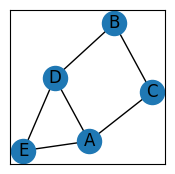

In [15]:
plt.figure(figsize = (2, 2)) # para ponerle un tamaño al gráfico
nx.draw_networkx(G)

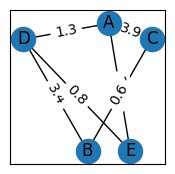

In [25]:
# para graficar con los pesos de las conexiones y posiciones de los nodos
plt.figure(figsize = (2, 2))

positions = nx.get_node_attributes(G, "pos") # agregar posiciones
weights = nx.get_edge_attributes(G, "weight") # agregar los pesos
 
nx.draw_networkx(G, pos = positions) 
nx.draw_networkx_edge_labels(G, pos = positions, edge_labels = weights); 

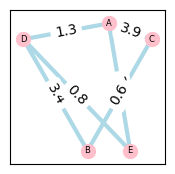

In [38]:
plt.figure(figsize = (2, 2))

# agregando más atributos
nx.draw_networkx(G, pos = positions, node_size = 100, font_size = 6, width = 3, 
                 node_color = "pink", edge_color = "lightblue")
nx.draw_networkx_edge_labels(G, pos = positions, edge_labels = weights); 

## Interacción entre paquetes

In [39]:
nx.to_pandas_edgelist(G)

,source,target,weight
0,A,D,1.3
1,A,C,3.9
2,A,E,2.2
3,B,C,0.6
4,B,D,3.4
5,D,E,0.8


In [40]:
list(G.adjacency())

[('A', {'D': {'weight': 1.3}, 'C': {'weight': 3.9}, 'E': {'weight': 2.2}}),
 ('B', {'C': {'weight': 0.6}, 'D': {'weight': 3.4}}),
 ('C', {'A': {'weight': 3.9}, 'B': {'weight': 0.6}}),
 ('D', {'A': {'weight': 1.3}, 'E': {'weight': 0.8}, 'B': {'weight': 3.4}}),
 ('E', {'D': {'weight': 0.8}, 'A': {'weight': 2.2}})]

In [44]:
# para crear la matriz de adyacencia
adjacency = nx.to_pandas_adjacency(G)
adjacency

,A,B,C,D,E
A,0.0,0.0,3.9,1.3,2.2
B,0.0,0.0,0.6,3.4,0.0
C,3.9,0.6,0.0,0.0,0.0
D,1.3,3.4,0.0,0.0,0.8
E,2.2,0.0,0.0,0.8,0.0


In [45]:
adjacency.to_csv("adjacency_ej.csv")

In [46]:
import pandas as pd

In [56]:
# podemos cargar archivos
df = pd.read_csv("adjacency_ej.csv")

df.set_index("Unnamed: 0", drop = True, inplace = True)
newG = nx.from_pandas_adjacency(df)
newG

In [57]:
df

,A,B,C,D,E
Unnamed: 0,,,,,
A,0.0,0.0,3.9,1.3,2.2
B,0.0,0.0,0.6,3.4,0.0
C,3.9,0.6,0.0,0.0,0.0
D,1.3,3.4,0.0,0.0,0.8
E,2.2,0.0,0.0,0.8,0.0


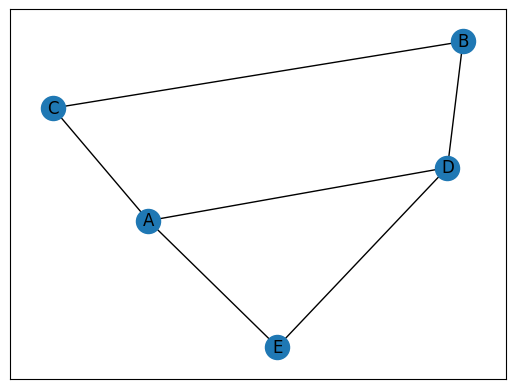

In [58]:
nx.draw_networkx(newG)

## TAREA
- subir archivos EEG de excel, obtener de la primera hoja un grafo bidimensional
- de la matriz EEG usando las coordenadas de EEG_3D_coordinates